In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import yfinance as yf

In [2]:
start='2010-01-01'
end='2019-12-31'



In [3]:
import yfinance as yf

In [4]:
df=yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557106,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004578,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.977631,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.398903,144114400


In [7]:
df=df.reset_index()

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557106,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004578,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.977631,146266000


In [9]:
df=df.drop(['Date','Adj Close'],axis=1)

In [10]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


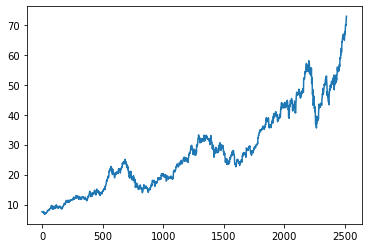

In [11]:
plt.plot(df.Close)

In [12]:
ma100=df.Close.rolling(100).mean()


In [13]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

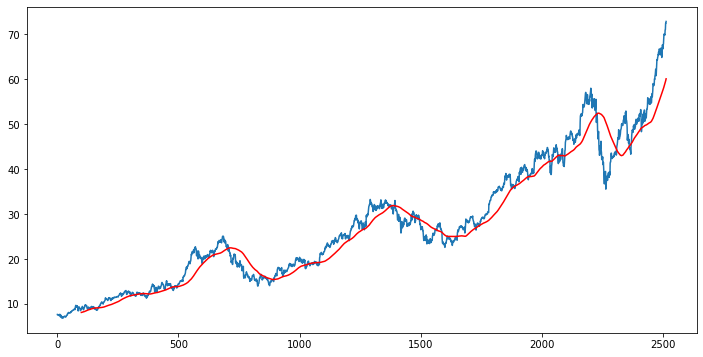

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200=df.Close.rolling(200).mean()

In [16]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

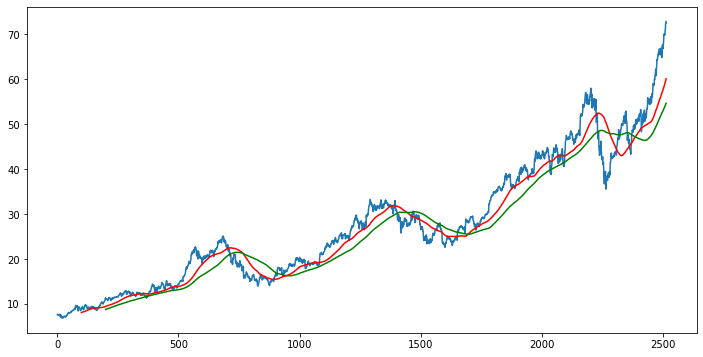

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
df.shape

(2515, 5)

In [19]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [20]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [21]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scaler.fit_transform(data_training)

In [25]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [26]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)  

In [27]:
#ML Model

In [30]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential

In [31]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [38]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 22s 255ms/step - loss: 0.0448
Epoch 2/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0109
Epoch 3/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0097
Epoch 4/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0088
Epoch 5/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0089
Epoch 6/50
52/52 [==============================] - 13s 247ms/step - loss: 0.0080
Epoch 7/50
52/52 [==============================] - 13s 247ms/step - loss: 0.0074
Epoch 8/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0074
Epoch 10/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0070
Epoch 11/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 13s 247ms/step - loss: 0.0066
Epoch 13/50
5

In [39]:
model.save('keras_model.h5')

In [40]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [41]:
past_100_days=data_training.tail(100)

In [42]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [44]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [46]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [47]:
input_data.shape

(855, 1)

In [48]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [49]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [50]:
#making prediction

y_predicted=model.predict(x_test)

24/24 [==============================] - 5s 130ms/step


In [51]:
y_predicted.shape

(755, 1)

In [52]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [53]:
y_predicted

array([[0.11131015],
       [0.11210942],
       [0.1129176 ],
       [0.1136934 ],
       [0.11440194],
       [0.11501625],
       [0.11552608],
       [0.11593874],
       [0.11627807],
       [0.11657059],
       [0.11684582],
       [0.11712094],
       [0.11740516],
       [0.11770944],
       [0.11803782],
       [0.11838704],
       [0.11875108],
       [0.11912158],
       [0.11949137],
       [0.11986977],
       [0.12026462],
       [0.12067969],
       [0.12111118],
       [0.12157229],
       [0.12214479],
       [0.12290157],
       [0.12390317],
       [0.1251485 ],
       [0.126699  ],
       [0.12858592],
       [0.13081458],
       [0.13337421],
       [0.13625246],
       [0.13943568],
       [0.14289422],
       [0.14658852],
       [0.15047431],
       [0.15449703],
       [0.15852156],
       [0.16245434],
       [0.16624996],
       [0.16986372],
       [0.1732847 ],
       [0.17651373],
       [0.17956725],
       [0.18246214],
       [0.18521148],
       [0.187

In [54]:
scaler.scale_

array([0.02123255])

In [55]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

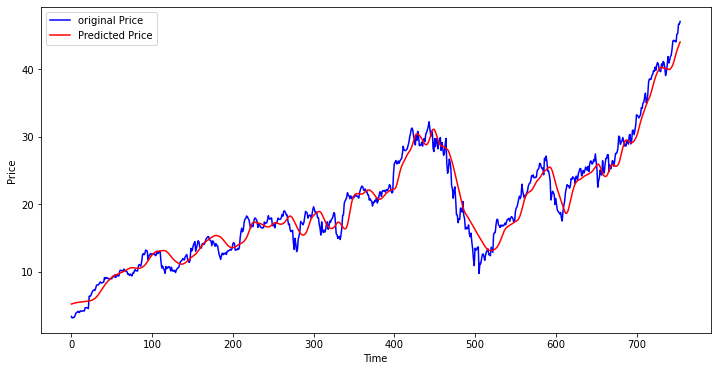

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
import streamlit as st


ModuleNotFoundError: No module named 'streamlit'

Note: you may need to restart the kernel to use updated packages.Collecting streamlit

  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)
  Using cached rich-12.6.0-py3-none-any.whl (237 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached blinker-1.5-py2.py3-none-any.whl (12 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=26c1f34274ba5222b339ccb6a28c56714b78423e70c34ee491b268884a34e99f
  Stored in direct

In [61]:
import streamlit as st

In [63]:
start='2010-01-01'
end='2019-12-31'


st.title('stock Trend Prediction')

user_input=st.text_input('Enter stock ticker','AAPL')
df=yf.download(user_input,start,end)

#describing Data
st.subheader('Data from 2010-2019')
st.write(df.describe())

2022-12-27 19:40:04.578 
  command:

    streamlit run C:\Users\ESDC\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%***********************]  1 of 1 completed
